In [42]:
import glob
import numpy as np
import os

In [43]:
idx_train = glob.glob("./dataset/selfie/training/*.png")
idx_test = glob.glob("./dataset/selfie/testing/*.png")

In [44]:
partition = {}

train_path = "./dataset/selfie/training/"
test_path  = "./dataset/selfie/testing/"

IDs = []

for train_i in idx_train:
    train_ID = train_i.split("/")[-1]
    if 'matte' not in train_ID:
        IDs.append(os.path.join(train_path, train_ID))

for test_i in idx_test:
    test_ID = test_i.split("/")[-1]
    if 'matte' not in test_ID:
        IDs.append(os.path.join(test_path, test_ID))

IDs.sort()

In [45]:
# add supervisely dataset

In [46]:
len(IDs)

2000

In [47]:
IDs[:1]

['./dataset/selfie/testing/00001.png']

In [48]:
import os 
import glob
import cv2
import json
import matplotlib.pyplot as plt
import numpy as np 

dataset_path = "./dataset/Supervisely_person_dataset/"

In [49]:
os.listdir(dataset_path)

['.DS_Store',
 'ds6',
 'ds1',
 'ds8',
 'ds10',
 'ds11',
 'ds9',
 'ds7',
 'Readme.md',
 '.ipynb_checkpoints',
 'ds2',
 'ds5',
 'ds13',
 'ds12',
 'ds4',
 'ds3']

In [50]:
ds_list = sorted([os.path.join(dataset_path, p) for p in os.listdir(dataset_path) if "." not in p])

In [51]:
ds_list

['./dataset/Supervisely_person_dataset/ds1',
 './dataset/Supervisely_person_dataset/ds10',
 './dataset/Supervisely_person_dataset/ds11',
 './dataset/Supervisely_person_dataset/ds12',
 './dataset/Supervisely_person_dataset/ds13',
 './dataset/Supervisely_person_dataset/ds2',
 './dataset/Supervisely_person_dataset/ds3',
 './dataset/Supervisely_person_dataset/ds4',
 './dataset/Supervisely_person_dataset/ds5',
 './dataset/Supervisely_person_dataset/ds6',
 './dataset/Supervisely_person_dataset/ds7',
 './dataset/Supervisely_person_dataset/ds8',
 './dataset/Supervisely_person_dataset/ds9']

In [52]:
mask_machine_list = []

for ds in ds_list:
    mask_machine_list += [os.path.join(ds, "masks_machine", p) for p in os.listdir(os.path.join(ds, 'masks_machine'))]
    

In [53]:
mask_machine_list[:3]

['./dataset/Supervisely_person_dataset/ds1/masks_machine/pexels-photo-541523_matte.png',
 './dataset/Supervisely_person_dataset/ds1/masks_machine/pexels-photo-395196_matte.png',
 './dataset/Supervisely_person_dataset/ds1/masks_machine/pexels-photo-588561_matte.png']

In [54]:
for ds in ds_list:

    IDs += [os.path.join(ds, "img", p) for p in os.listdir(os.path.join(ds, "img"))]

In [55]:
len(IDs)

7711

In [57]:
excluding = []
ks = []

for ID in IDs[2000:]:
    
    mask_ID = ID.split(".p")[0] + "_matte.png"

    if 'Supervisely' in mask_ID:
        mask_ID = mask_ID.replace("/img/", "/masks_machine/")
        mask_ID = mask_ID.replace(".jpeg", "")
        
    mask = cv2.imread(mask_ID, cv2.IMREAD_GRAYSCALE)
    
    if "Supervisely" in mask_ID:
        mask = mask * 255
    
    mask = cv2.resize(mask, (256,256))
    edge = cv2.Canny(mask, 50, 100)  
    
    k = np.int((mask[mask > 50].shape[0] / (256 * 256)) * 50)

    if k < 15:
        excluding.append(ID)
#         print(mask_ID)


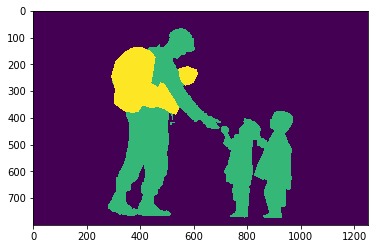

In [58]:
plt.imshow(cv2.imread("./dataset/Supervisely_person_dataset/ds1/masks_machine/soldier-military-uniform-american_matte.png", cv2.IMREAD_GRAYSCALE))

In [25]:
import seaborn as sns

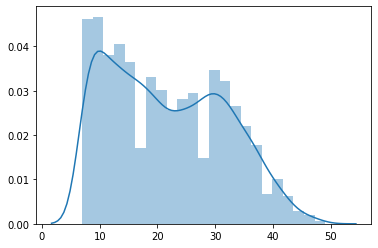

In [26]:
sns.distplot(ks)

In [59]:
len(excluding)

3703

In [60]:
## excluding small object images

for ex in excluding:
    IDs.remove(ex)

In [61]:
len(IDs), IDs

(4008,
 ['./dataset/selfie/testing/00001.png',
  './dataset/selfie/testing/00002.png',
  './dataset/selfie/testing/00003.png',
  './dataset/selfie/testing/00004.png',
  './dataset/selfie/testing/00005.png',
  './dataset/selfie/testing/00006.png',
  './dataset/selfie/testing/00007.png',
  './dataset/selfie/testing/00008.png',
  './dataset/selfie/testing/00009.png',
  './dataset/selfie/testing/00010.png',
  './dataset/selfie/testing/00011.png',
  './dataset/selfie/testing/00012.png',
  './dataset/selfie/testing/00013.png',
  './dataset/selfie/testing/00014.png',
  './dataset/selfie/testing/00015.png',
  './dataset/selfie/testing/00016.png',
  './dataset/selfie/testing/00017.png',
  './dataset/selfie/testing/00018.png',
  './dataset/selfie/testing/00019.png',
  './dataset/selfie/testing/00020.png',
  './dataset/selfie/testing/00021.png',
  './dataset/selfie/testing/00022.png',
  './dataset/selfie/testing/00023.png',
  './dataset/selfie/testing/00024.png',
  './dataset/selfie/testing/00025

#### Portrait dataset

In [15]:
# # save
# np.save("./dataset/img_paths.npy", IDs)

# img_paths = np.load("./dataset/img_paths.npy")

####  Include supervisely dataset

In [17]:
# save with supervisely dataset

# np.save("../dataset/img_paths_with_supervisely.npy", IDs)

# img_paths = np.load("../dataset/img_paths_with_supervisely.npy")

####  exclude small object images with threshold of k < 7

In [22]:
# save without wrong mask label

# np.save("./dataset/img_paths_with_supervisely_nosmallobject.npy", IDs)

# img_paths = np.load("./dataset/img_paths_with_supervisely_nosmallobject.npy")

####  exclude small object images with threshold of k < 15

In [62]:
# save without wrong mask label

np.save("./dataset/img_paths_with_supervisely_nosmallobject_k15.npy", IDs)

img_paths = np.load("./dataset/img_paths_with_supervisely_nosmallobject_k15.npy")